#  PREDICTION ON GHOULS DATASET

In [76]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)# To suppress all the warnings in the notebook.

from collections import Counter
import time

In [156]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv")


In [157]:
data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


__Observations__

There are a total of 371 samples(rows) and 7 columns in the dataframe.

There are 5 columns with a numeric datatype and 2 columns with an object datatype.

There are no missing values in any of the column.

In [14]:
data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


__Observations__

1)Almost all the columns from bone-length to hair-length __have normal-distribution because the mean value is close to the     median__.

2)While we observe that the column __has_soul__ is __positive(right)skewed__ as the mean(0.471392) of th column lies to the       right of the median(0.466372) on a distribution plot.



In [112]:
data_cat = data.select_dtypes(include=['object'])
data_cat.columns.tolist()

['color', 'type']

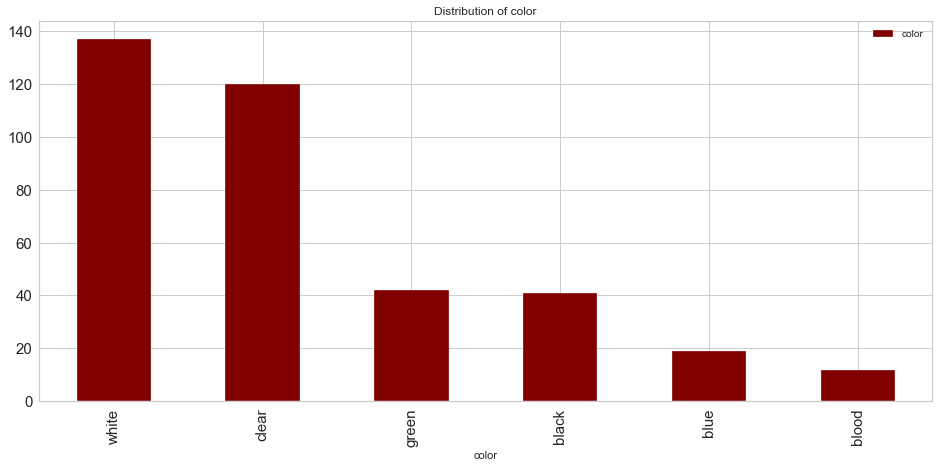

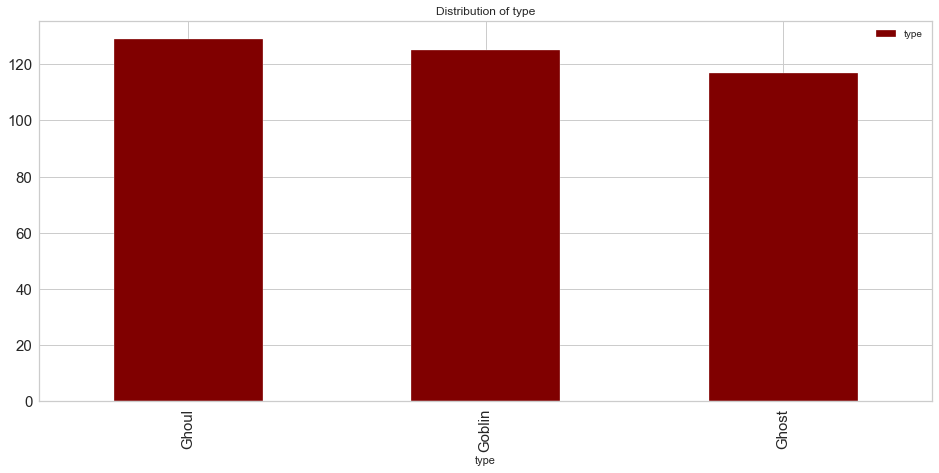

In [129]:
for i in data_cat.columns.tolist():
    
    dist= pd.DataFrame(data_cat[i].value_counts().sort_values(ascending=False)).reset_index()
   

    ax = dist.plot.bar(x='index',y=i,fontsize=15, figsize=(16,7),color='maroon')

    ax.set_title("Distribution of "+i)
    ax.set_xlabel(i)
    

__Observations__

1)In the 1st bar graph we see that white and clear colours are mostly seen in the creatures.

2)2nd graph shows us Ghoul types can be seen in the majority followed by the Goblin and the Ghost.


## Percentage of the most common type and color

Text(0.5, 1.0, 'Bar Chart showing the proportion of types in the creatures')

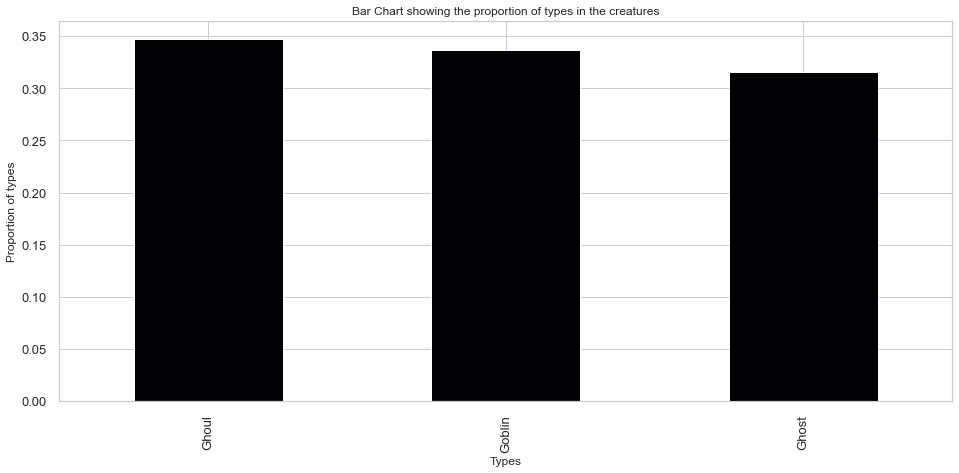

In [159]:
(data_cat["type"].value_counts() / len(data_cat)).plot(kind='bar', figsize=(16,7), colormap='magma', fontsize=13)

plt.xlabel('Types')
plt.ylabel('Proportion of types')
plt.title('Bar Chart showing the proportion of types in the creatures')

__Observations__

Here we observe the types of the creature are almost equally distributed.

Text(0.5, 1.0, 'Bar Chart showing the proportion of colors in the creatures')

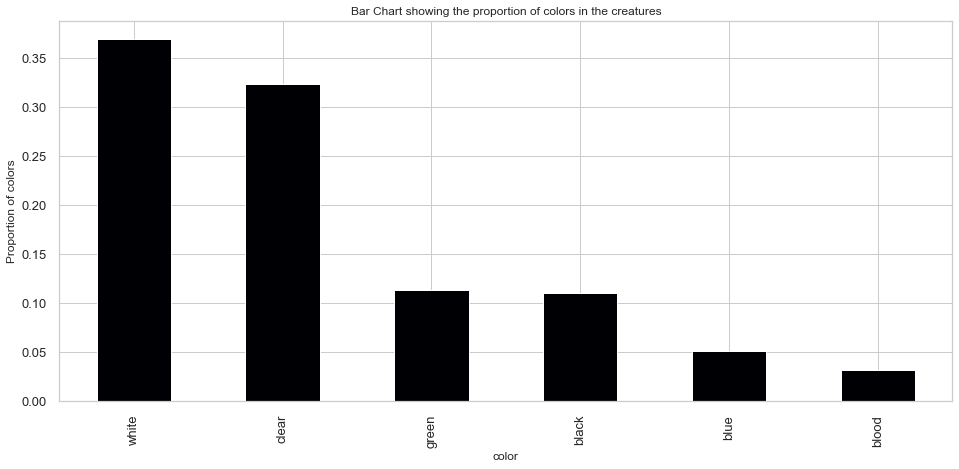

In [160]:
(data_cat["color"].value_counts() / len(data_cat)).plot(kind='bar', figsize=(16,7), colormap='magma', fontsize=13)

plt.xlabel('color')
plt.ylabel('Proportion of colors')
plt.title('Bar Chart showing the proportion of colors in the creatures')


__Observations__

More than 65% of the color are seen white and clear of all the colors.


In [38]:
data_num =data.select_dtypes(exclude=['object'])
data_num.columns.tolist()

['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul']

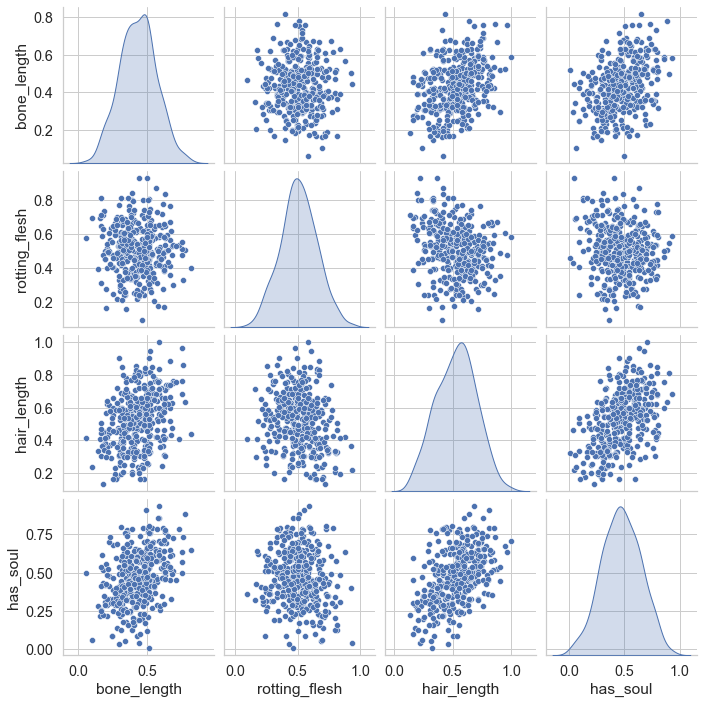

In [43]:
sns.pairplot(data=data_num[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']], size=2.5, diag_kind='kde')

<AxesSubplot:title={'center':'Color vs bone_length of the Creatures'}, xlabel='color', ylabel='bone_length'>

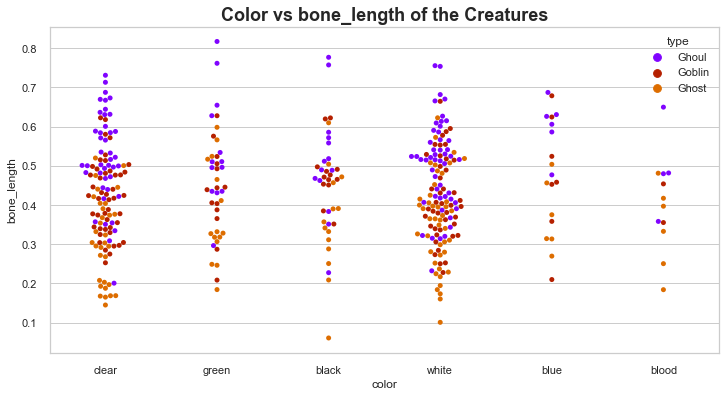

In [149]:
sns.set(style="whitegrid", palette="muted")


# "Melt" the dataset to "long-form" or "tidy" representation
pd.melt(data, "bone_length")
plt.figure(figsize=(12,6))
plt.title('Color vs bone_length of the Creatures',fontsize=18,fontweight="bold")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="color", y="bone_length", hue="type", 
              palette='gnuplot', data=data)

__Observation__

Creatures of color white having bone-length of the range 0.3-0.6 can be observed most in all types


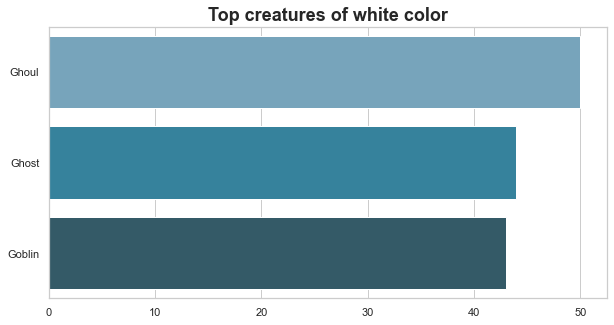

In [66]:
colors = data.loc[data['color'] == 'white']
top = colors['type'].value_counts().to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top['type'],top.index,palette="PuBuGn_d")
plt.title('Top creatures of white color',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

__Observations__

__Ghoul__ are the creatures which can be seen at the top which are of color __White__ with  50 counts.

## Outliers Check

Text(0.5, 1.0, 'Outliers')

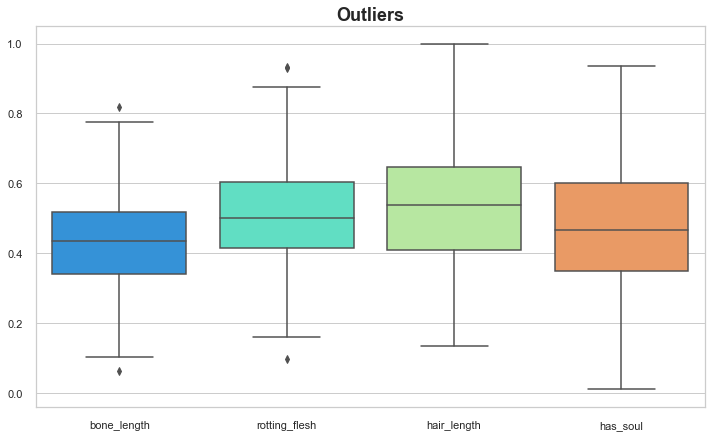

In [146]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data[['bone_length','rotting_flesh','hair_length','has_soul']], palette='rainbow')

plt.title('Outliers',fontsize=18,fontweight="bold")

__Observations__

Here we see __bone_length__ have outliers __below 0.1 and above 0.7__ and __rotting_flesh__ have outliers __below 0.2 and above 0.9__ where as there are no outliers in hair_length and has_soul.

Text(0.5, 1.0, 'Creatures having Rotting flesh')

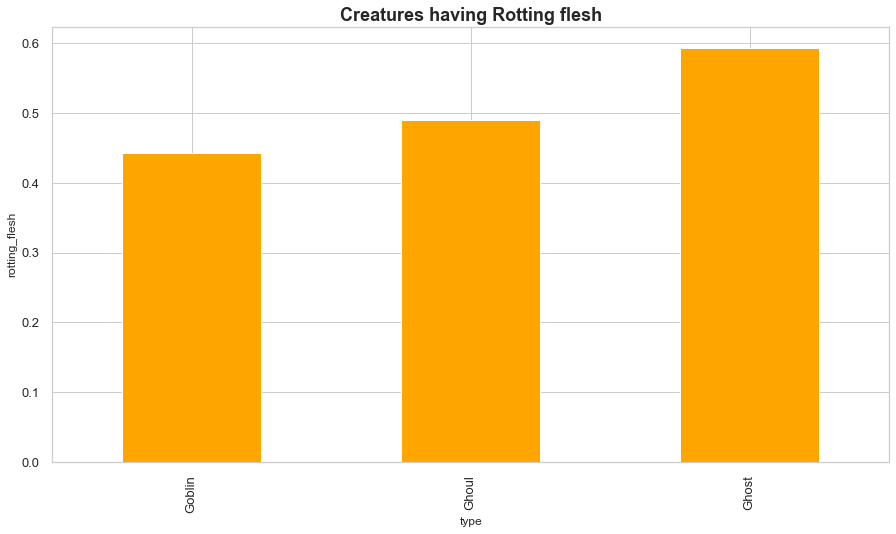

In [144]:
data.groupby(['type'])['rotting_flesh'].mean().sort_values().plot(kind='bar', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('rotting_flesh')
plt.title('Creatures having Rotting flesh',fontsize=18,fontweight="bold")

__Observations__

1)The __Rotting_Flesh__ is found in the most amount in the __Ghost type__.

2)The most common type __Ghoul__ can only be seen behind the __Ghost type__.



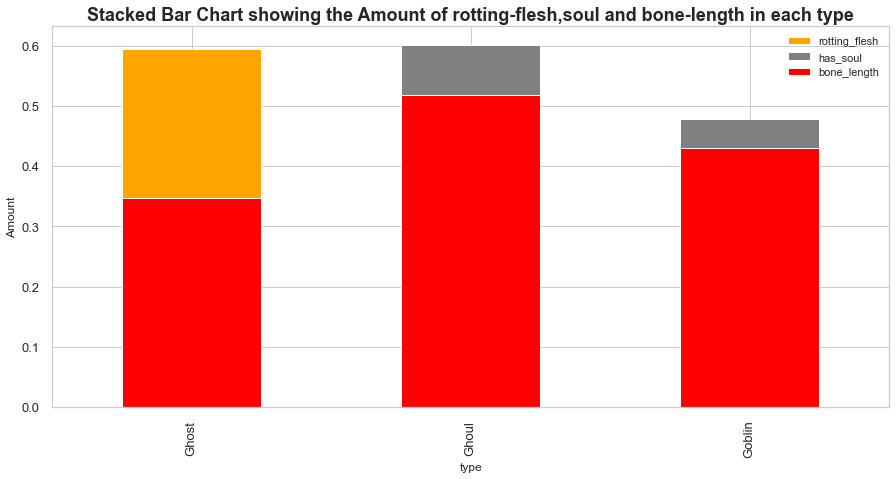

In [154]:
data.groupby(['type'])['rotting_flesh'].mean().plot(kind='bar', figsize=(15, 7), color='orange')
data.groupby(['type'])['has_soul'].mean().plot(kind='bar', figsize=(15, 7), color='grey')
data.groupby(['type'])['bone_length'].mean().plot(kind='bar', figsize=(15, 7), color='red', fontsize=13)

plt.xlabel('type')
plt.ylabel('Amount')
plt.title('Stacked Bar Chart showing the Amount of rotting-flesh,soul and bone-length in each type',fontsize=18,fontweight="bold")
plt.legend(labels=('rotting_flesh', 'has_soul', 'bone_length'))


__Observation__

1)Here we can see  the average rotting flesh occurs mostly in the __Ghost type__ having  __bone_length__ from 0=0.3 and having __no soul__ .

2)Where __Ghoul type__ having the highest __bone_length__ from 0-0.5 have the highest percentage of soul in compared to the others showing negligble amount of __rotting_flesh__ followed by the Goblin type having negligible  __rotting_flesh__.




<b> From the above, we can see that there are 2 categorical data. Here we have to create dummy variables of them.</b>

In [3]:
data1 = pd.get_dummies(data, columns=['color'], drop_first=True)

In [4]:
data1

,id,bone_length,rotting_flesh,hair_length,has_soul,type,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,Goblin,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,Ghoul,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,Ghoul,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,Ghost,0,0,0,1,0
5,7,0.405680,0.253277,0.441420,0.280324,Goblin,0,0,0,1,0
6,8,0.399331,0.568952,0.618391,0.467901,Goblin,0,0,0,0,1
7,11,0.516224,0.536429,0.612776,0.468048,Ghoul,0,0,1,0,0
8,12,0.314295,0.671280,0.417267,0.227548,Ghost,0,1,0,0,0
9,19,0.280942,0.701457,0.179633,0.141183,Ghost,0,0,0,0,1


Text(0.5, 1.0, 'Correlation between features')

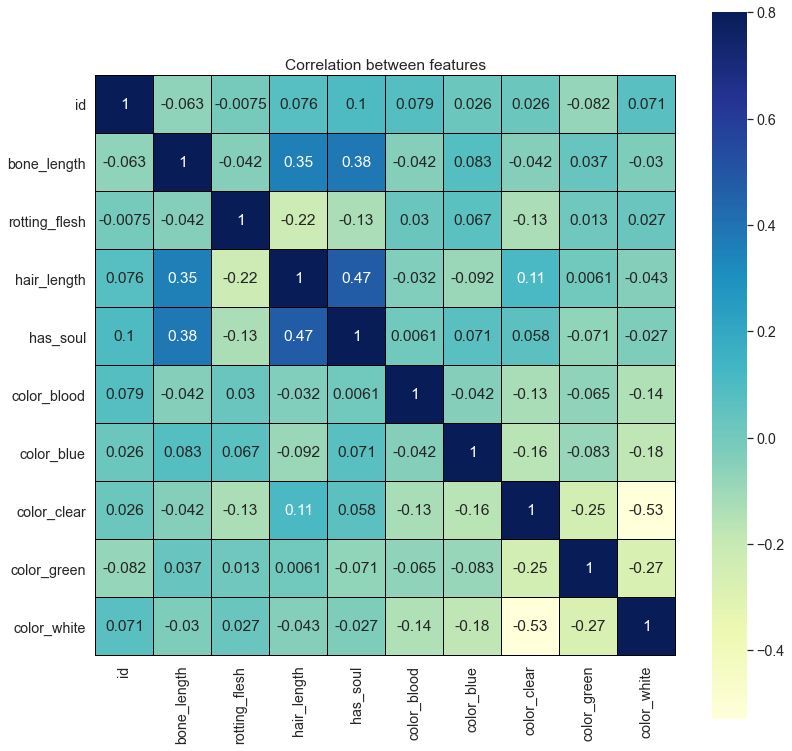

In [131]:
corr = data1.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

__Observations__

1)__color_blood ,color_blue, color_white  and rotting_flesh__ are negatively correlated with __hair_length__.

2)__bone_length__ is also negatively correlated with __color_white,color_clear,color_blood,rotting_flesh__.

3)__rotting_flesh__ is also negatively correlated with __color_clear,has_soul,hair_length,bone_length__.

4)__has_soul__ is positively correlated with __bone_length , hair_length,type_Ghoul__. 

In [5]:
Train=data1

In [18]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    371 non-null    float64
 1   rotting_flesh  371 non-null    float64
 2   hair_length    371 non-null    float64
 3   has_soul       371 non-null    float64
 4   type           371 non-null    object 
 5   color_blood    371 non-null    uint8  
 6   color_blue     371 non-null    uint8  
 7   color_clear    371 non-null    uint8  
 8   color_green    371 non-null    uint8  
 9   color_white    371 non-null    uint8  
dtypes: float64(4), object(1), uint8(5)
memory usage: 16.4+ KB


### Dropping redundant variables

In [6]:
Train.drop(['id'],axis=1,inplace=True)

In [19]:
m = list(Train.columns)
n = list(filter(lambda t: t not in ['type'], m))

### Preparing X 

In [20]:
X= Train[n]

### Preparing y

In [21]:
y = Train['type']

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Standardizing the variables

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<a id=section6></a>
### Modelling and prediction

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.00447845458984375


In [26]:
y_pred = fit1.predict(X_test_sc)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[35  0  6]
 [ 0 29  6]
 [ 3  9 24]]
              precision    recall  f1-score   support

       Ghost       0.92      0.85      0.89        41
       Ghoul       0.76      0.83      0.79        35
      Goblin       0.67      0.67      0.67        36

    accuracy                           0.79       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.79      0.79      0.79       112



#  MODEL 1: Logistic Regression

# Applying LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit2 = classifier.fit(X_train, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.0032129287719726562


In [31]:
y_pred = fit2.predict(X_test)

# Confusion Matrix and Classification Report

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [35]:
print(cm)
print(cr)

[[33  0  8]
 [ 0 31  4]
 [ 3  9 24]]
              precision    recall  f1-score   support

       Ghost       0.92      0.80      0.86        41
       Ghoul       0.78      0.89      0.83        35
      Goblin       0.67      0.67      0.67        36

    accuracy                           0.79       112
   macro avg       0.79      0.79      0.78       112
weighted avg       0.79      0.79      0.79       112



<b>Applying LDA and then performing Logistic Regression gives us an accuracy score of 79%. 

<a id=section7></a>
### Computing time difference between two different logistic regression models created

In [36]:
time_diff = time3/time2
print(time_diff)

0.7174190800681431


<a id=section8></a>
## Applying KNN, SVM and Decision Tree and comparing using accuracy score

### Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<b>Applying LDA</b>

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [92]:
lda = LDA(n_components = 2,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

<b> 1) Performing KNN </b>

<b> Choosing the best K </b>

In [100]:
!pip install yellowbrick

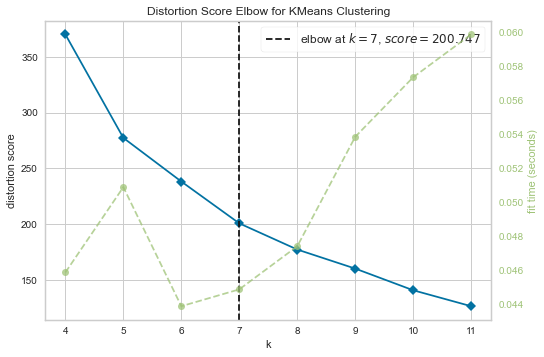

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

In [109]:
pred = knn.predict(X_test)

<b> Report </b>

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[23  0  6]
 [ 0 18  4]
 [ 2  4 18]]
              precision    recall  f1-score   support

       Ghost       0.92      0.79      0.85        29
       Ghoul       0.82      0.82      0.82        22
      Goblin       0.64      0.75      0.69        24

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.80      0.79      0.79        75



### Model Evaluation using accuracy score.

In [111]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.7866666666666666


#  MODEL 3: SVM

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<b> Applying LDA </b>

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2,solver='svd')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [49]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train,y_train)

SVC(C=100)

In [50]:
predictions = model.predict(X_test)

<b> Report </b>

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[31  0 10]
 [ 0 32  3]
 [ 3 12 21]]
              precision    recall  f1-score   support

       Ghost       0.91      0.76      0.83        41
       Ghoul       0.73      0.91      0.81        35
      Goblin       0.62      0.58      0.60        36

    accuracy                           0.75       112
   macro avg       0.75      0.75      0.75       112
weighted avg       0.76      0.75      0.75       112



In [52]:
print(accuracy_score(y_test, predictions))

0.75


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [63]:
dt = DTC(criterion='entropy',splitter='random')

In [64]:
tree = dt.fit(X_train,y_train)

In [65]:
pred_t = dt.predict(X_test)

In [66]:
cm = confusion_matrix(y_test,pred_t)

In [68]:
cr = classification_report(y_test,pred_t)

In [69]:
print(cm)
print(cr)

[[33  2  6]
 [ 1 23 11]
 [ 5 14 17]]
              precision    recall  f1-score   support

       Ghost       0.85      0.80      0.83        41
       Ghoul       0.59      0.66      0.62        35
      Goblin       0.50      0.47      0.49        36

    accuracy                           0.65       112
   macro avg       0.65      0.64      0.64       112
weighted avg       0.65      0.65      0.65       112



In [70]:
print(accuracy_score(y_test, pred_t))

0.6517857142857143


<a id=section9></a>
### Conclusions

From this we can see that the best algorithm to predict what kind of creatutre type it is **Logistic Regression** followed by  **KNN** 

## Model Deployment

__As we got best accuracy using Logistic Regression Model,we  will use this as our final model__.

In [72]:
data2=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv")
data2.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [73]:
data2.drop(['id'],axis=1,inplace=True)

In [75]:
data3 = pd.get_dummies(data2, columns=['color'], drop_first=True)
data3.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.471774,0.387937,0.706087,0.698537,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,0,0,0,0,0


### Standardizing the variables

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data3_sc = sc.fit_transform(data3)


In [89]:
data3_pred = fit1.predict(data3_sc)
data3_pred

array(['Ghoul', 'Goblin', 'Ghoul', 'Goblin', 'Ghost', 'Ghost', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghost',
       'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul',
       'Ghoul', 'Ghoul', 'Goblin', 'Goblin', 'Goblin', 'Ghoul', 'Goblin',
       'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Goblin',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul',
       'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Goblin', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Goblin', 'Ghoul',
       'Goblin', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghoul', 'Ghoul',
       'Ghost', 'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost',
       'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Ghost', 'Goblin', 'Go

__This is our prediction with the new dataset of Ghouls__.